## Fourier Series Composition / Decomposition

One of the most important principles of signal analysis is the notion that all signal patterns can be decomposed into a combination of sine and cosine components (where sometimes an infinite number of these are required for accurate representation).  Linear combinations of these sine and cosine components will then reproduce the original signal:

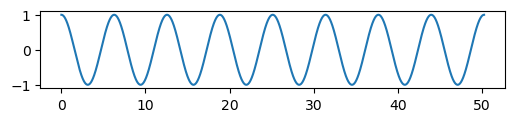

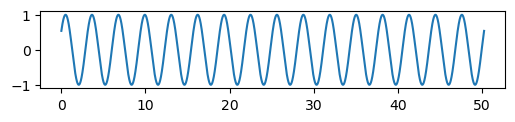

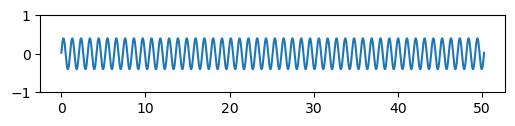

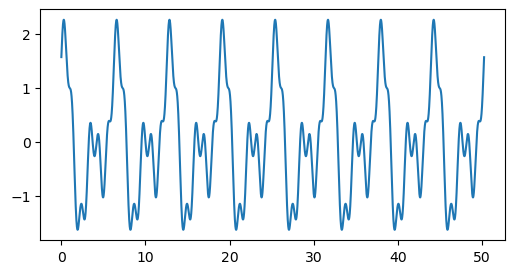

In [1]:
import numpy as np
%matplotlib inline
import pylab as plt

x = np.arange(0,8*2*np.pi,0.001)
plt.figure(figsize=(6,1))
y1 = np.cos(x)
plt.plot(x, y1)
plt.figure(figsize=(6,1))
y2 = np.cos(2*x-1)
plt.plot(x, y2)
plt.figure(figsize=(6,1))
y3 = 0.4*np.cos(6*x-1.5)
plt.ylim(-1,1)
plt.plot(x, y3)
plt.figure(figsize=(6,3))
plt.plot(x, y1+y2+y3)

With a Fourier Transform, the final plot above can be reversed to obtain the sinusoidal components used to create it.  With enough sinusoidal components, all signals can be analyzed in this way, even if they are non-repeating.  However, for signals which change their patterns substantially with time, we are often interested in examining the sinusoidal components characteristic of a restricted portions of the signal.  For this we will use a technique called wavelet analysis.

## Frequency Analysis

Here we will visually examine the mathematical foundations of Fourier and Wavelet analyses of power and phase at various frequencies.  We will do this by examining the cosine and sine terms (or "real" and "imaginary" terms) in the complex plane, where the cosine/real term is one axis, and the sine/imaginary term is another axis.  This is justified by the Euler relation described in Chapter 4 of the EHM text.
\begin{equation}
e^{i\phi} = \cos(\phi) + i\sin(\phi)
\end{equation}

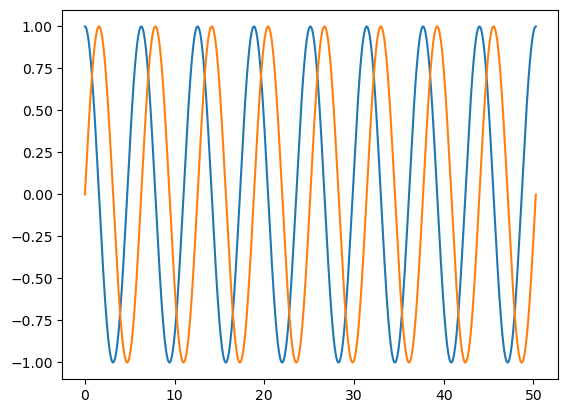

In [2]:
import numpy as np
%matplotlib inline
import pylab as plt

x = np.arange(0,8*2*np.pi,0.001)
plt.plot(x, np.cos(x))
plt.plot(x, np.sin(x))

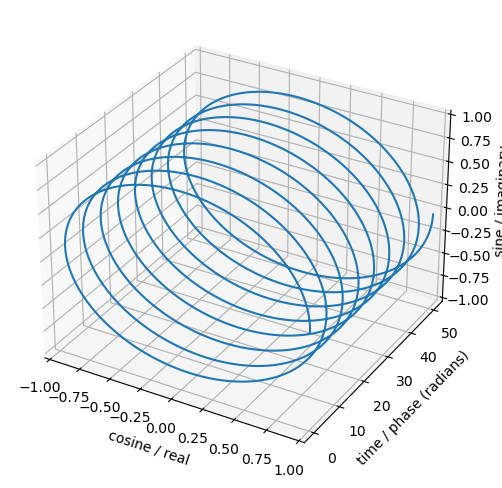

In [3]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-1,1)
ax.set_xlabel('cosine / real')
ax.set_zlim(-1,1)
ax.set_zlabel('sine / imaginary')
ax.set_ylabel('time / phase (radians)')
ax.plot(np.cos(x), x, np.sin(x))

a = 0.4619445214722019
b = 0.19133974381900626
M = 0.5000036384696661
phi (set to  0.39269908169872414 ) = 0.392691797813932


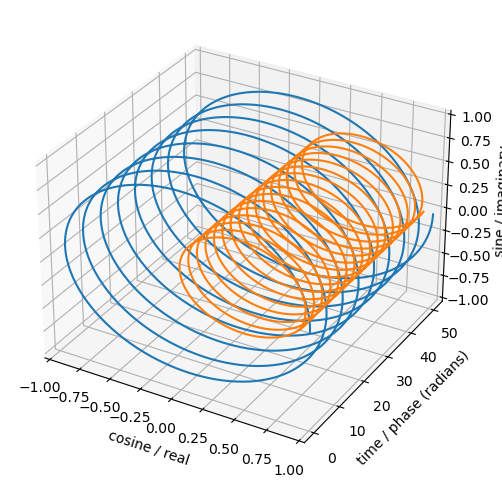

In [4]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-1,1)
ax.set_xlabel('cosine / real')
ax.set_zlim(-1,1)
ax.set_zlabel('sine / imaginary')
ax.set_ylabel('time / phase (radians)')
ax.plot(np.cos(x), x, np.sin(x))
func = np.cos(x-np.pi/8)   # Function analyzed defined here  ***
ax.plot(func*np.cos(x), x, func*np.sin(x))
a = np.mean(func*np.cos(x))
b = np.mean(func*np.sin(x))
M = np.sqrt(a*a + b*b)
print('a =', a)
print('b =', b)
print('M =', M)
print('phi (set to ', np.pi/8, ') =', np.arctan2(b,a))

a = 5.148038077820446e-06
b = -1.2418546526398915e-09
M = 5.14803822760595e-06


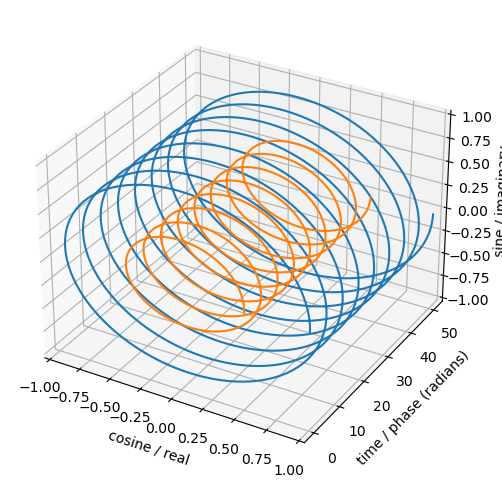

In [5]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-1,1)
ax.set_xlabel('cosine / real')
ax.set_zlim(-1,1)
ax.set_zlabel('sine / imaginary')
ax.set_ylabel('time / phase (radians)')
ax.plot(np.cos(x), x, np.sin(x))
func = 0.5   # Function analyzed defined here, flat 0.5 for all phase values  ***
ax.plot(func*np.cos(x), x, func*np.sin(x))
a = np.mean(func*np.cos(x))
b = np.mean(func*np.sin(x))
M = np.sqrt(a*a + b*b)
print('a =', a)
print('b =', b)
print('M =', M)

a = -1.98941595587647e-05
b = 1.1790346458828112e-08
M = 1.989416305256038e-05
phi = 3.141


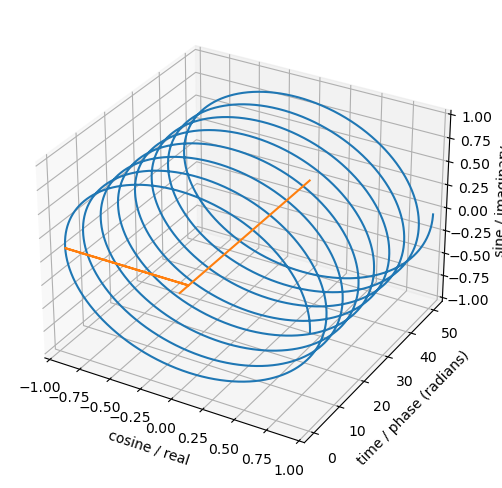

In [6]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-1,1)
ax.set_xlabel('cosine / real')
ax.set_zlim(-1,1)
ax.set_zlabel('sine / imaginary')
ax.set_ylabel('time / phase (radians)')
ax.plot(np.cos(x), x, np.sin(x))

func = np.zeros(len(x))    # Function analyzed defined here, delta function  ***
func[int(1000*np.pi)] = 1  # at the first phase value of pi, with x step 0.001

ax.plot(func*np.cos(x), x, func*np.sin(x))
a = np.mean(func*np.cos(x))
b = np.mean(func*np.sin(x))
M = np.sqrt(a*a + b*b)
print('a =', a)
print('b =', b)
print('M =', M)
print('phi =', np.arctan2(b,a))

# Wavelets

As you can see in the last case above, the signal only existed for a brief moment, but the Fourier analysis for that frequency simply recorded the phase of that spike, but discarded the portion of time in which it happened.  While we could recover this information by examining the phase of enough frequencies, this is not as easy to think about as explicitly restricting our frequency analysis to a small portion of time.  For this we can use wavelets.  The simplest Morlet Wavelet applies a Gaussian envelope to the sine and cosine terms.  (Proper "Complete" Morlet Wavelets are similar, but with some additional lengthy terms to correcly preserve phase and power.)

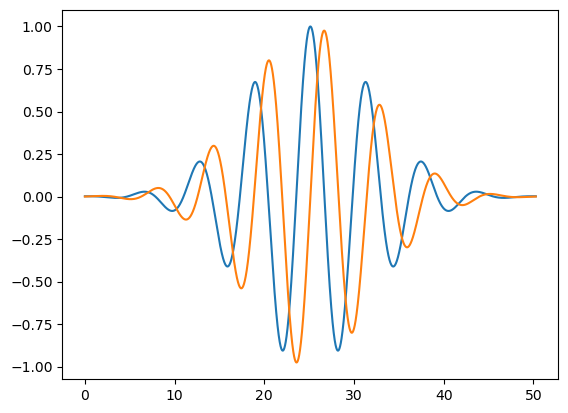

In [7]:
simple_morlet_cos = np.exp(-(1/2)*((x-x[int(len(x)/2)])/7)**2) * np.cos(x)
simple_morlet_sin = np.exp(-(1/2)*((x-x[int(len(x)/2)])/7)**2) * np.sin(x)

plt.plot(x, simple_morlet_cos)
plt.plot(x, simple_morlet_sin)

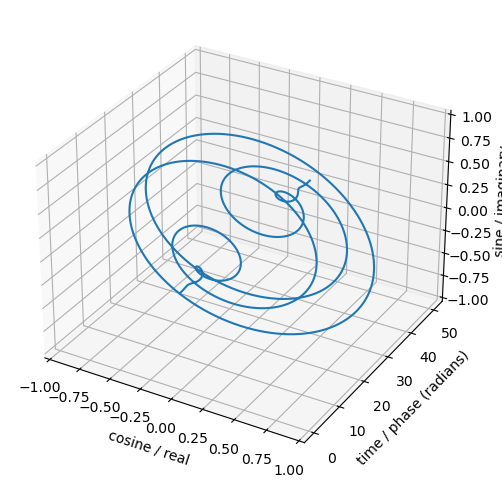

In [8]:
simple_morlet = np.exp(-(1/2)*((x-x[int(len(x)/2)])/7)**2) * (np.cos(x), np.sin(x))

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-1,1)
ax.set_xlabel('cosine / real')
ax.set_zlim(-1,1)
ax.set_zlabel('sine / imaginary')
ax.set_ylabel('time / phase (radians)')
ax.plot(simple_morlet[0], x, simple_morlet[1])

A signal multiplied by this Morlet Wavelet functions similarly to the Fourier case, except that only signal pieces in the Gaussian window are analyzed.  To examine another period of time, the wavelet is shifted and the next time period is analyzed.

## Connectivity

While connectivity -- or the correlation of timeseries data across brain regions -- has been studied in EEG data for two decades, it has recently surged in popularity. Inspired by work in the fMRI domain which showed that the brain is comprised of multi-region networks, scientists have recently asked whether they can find correlations in EEG activity across electrodes and brain regions. We say that regions with significant correlation exhibit **connectivity**, and may be using electrophysiological mechanisms to communicate or coordinate information processing.

<center>
<img src="figures/brain_network.png" width=600>
</center>

Obtaining connectivity:
<center>    
<img src="figures/connectivity_overview.png" width=600>
</center>

Phase-Locking Value (PLV):

<center>    
<img src="figures/phase_locking_value_schematic.png" width=600>
</center>

Synchronized theta activity, and desycnhronized gamma activity predict successful encoding:

<center>    
<img src="figures/synch_theta_desynch_gamma_encoding.png" width=600>
</center>

Gamma synchrony predicts lower gamma power, but theta synchrony predicts higher gamma power:

<center>    
<img src="figures/theta_gamma_sync_gamma_power.png" width=600>
</center>

Phase synchronization can also be determined with respect to externalized events, such as word presentation or electrical brain stimulation:

<center>    
<img src="figures/stim_phase_response.png" width=600>
</center>

To recap some central points: 

* EEG/ECoG connectivity is often **phase-based**, a measure which comes naturally from the spectral methods we discussed previously. 
* High connectivity is achieved when two EEG signals, or their phases, are **highly correlated** across time or trials. 
* **Phase-locking** occurs when there is a consistent phase difference between two signals

<br>

#### Additional packages to install for this lesson: 

**Brain Connectivity Toolbox (BCT)**: 
1. Clone this repo into your home directory ( https://github.com/aestrivex/bctpy ) 
2. Activate your CML environment, navigate to the cloned directory and then type <code>python setup.py install</code>

**pycircstat**: 
1. Activate your CML environment and type <code>conda install nose</code>
2. Type <code>pip install pycircstat</code>

### Example 1: Computing phase-locking value  (PLV) in R1001P

First, let's revisit our spectral decomposition earlier to get a time-varying measure of spectral phase:

In [ ]:
import cmlreaders as cml
import numpy as np
from ptsa.data.filters import ButterworthFilter
from ptsa.data.filters import MorletWaveletFilter

# We load the dataframe for all sessions.
df = cml.get_data_index('r1')

# Specify which subject and experiment we want
sub = 'R1111M'
exp = 'FR1'

# Select the dataframes for our subject and experiment.
df_select = df[(df['subject']==sub) & (df['experiment']==exp)]

recalled = []  # For storing encoding success.
sess_phase = []  # For storing our computed spectral powers.

for _, df_sess in df_select.iterrows():
    reader = cml.CMLReader(subject=df_sess.subject, experiment=df_sess.experiment, session=df_sess.session, 
                          localization=df_sess.localization, montage=df_sess.montage)
    pairs = reader.load('pairs')
    evs = reader.load('events')
    word_evs = evs[evs['type']=='WORD']
    
    buf = 1000     # to remove edge effects during wavelet convolution
    eeg_ptsa = reader.load_eeg(events=word_evs, rel_start=-buf, rel_stop=1600+buf, scheme=pairs).to_ptsa()
    sr = eeg_ptsa.samplerate
    
    # Filter out line noise.
    freq_range = [58., 62.]
    b_filter = ButterworthFilter(freq_range=freq_range, filt_type='stop', order=4)
    eeg_filtered = b_filter.filter(eeg_ptsa)
        
    # Get spectral PHASE.
    myfreqs = np.array([3, 4, 5, 6, 7, 8])   # Focus on theta frequencies.
    wf = MorletWaveletFilter(freqs=myfreqs, width=5, output='phase')
    phase_wavelet = wf.filter(eeg_filtered)   # Output is [freqs, events, elecs, time].
    # Remove buffer period.
    phase = phase_wavelet.data[:, :, :, int((buf/1000.)*sr):-1*int((buf/1000.)*sr)]
    
    sess_phase.append(phase)

    # We need to store this data across-sessions.
    recalled.extend(list(word_evs['recalled']))

    print(str(df_sess.session)+' completed successfully!')    

CPP total time wavelet loop:  11.365057468414307
0 completed successfully!
CPP total time wavelet loop:  8.941809892654419
1 completed successfully!
CPP total time wavelet loop:  19.260499715805054
2 completed successfully!


In [ ]:
# Combine phase information into one array.
# Note that we didn't z-score, since phases are already in a standardized range.
all_phase = np.concatenate(sess_phase, axis=1)

What does phase information actually look like? How do we represent it? We could plot it as a timeseries:

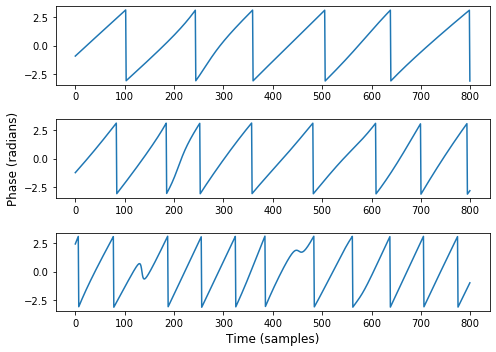

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
ax = plt.subplot(311)
plt.plot(all_phase[0, 0, 0, :])  # 3Hz, first event, first electrode.
ax = plt.subplot(312)
plt.plot(all_phase[2, 0, 0, :])  # 5Hz
plt.ylabel('Phase (radians)', fontsize=12)
ax = plt.subplot(313)
plt.plot(all_phase[4, 0, 0, :])  # 7Hz
plt.xlabel('Time (samples)', fontsize=12)
plt.tight_layout()

Phase measures vary from 0 to +2pi. Often, the wavelet transform imposes a level of consistency on the phase measure, so you'll often see phase vary smoothly around the circle. However, this is not a given -- you'll often find meaningful discontinuities or changes in the phase rate of change. 

**Note**: The discontinuities you see above are normal. The transition from -pi to +pi would be smooth if plotted on polar axes.

### Single-electrode phase-locking

Phase-locking refers to the consistency of a given phase (or phase difference) across time or across trials. For example, it is common to ask whether an oscillation exhibits phase locking to a a moment just after stimulus onset. Assessing this is relatively straightforward:

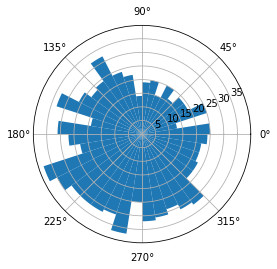

In [12]:
# Assess phase-locking to stimulus onset in electrode 0 of R1001P,
# at 5Hz, at the 150th sample, 300ms after word exposure].
phs = all_phase[2, :, 36, 150]

# Plot a polar histogram of those phases.
plt.figure(figsize=(4, 4))
ax = plt.subplot(111, polar=True)
# How to get polar histograms. (Super easy!)
plt.hist(phs, 40);

This looks pretty messy, but actually, there's decent evidence of phase locking. Many more phases are clustered in the right semicircle than the left (i.e. between 90 degrees and 270 degrees), indicating a preference for phases in that direction. We can use the **Rayleigh test** to ask whether this asymmetrical clustering is significant.

In [1]:
# We'll need the pycircstat package to help us with circular statistics.
import pycircstat as circ

circ.rayleigh?

Signature: circ.rayleigh(alpha, w=None, d=None, axis=None)
Docstring:
Computes Rayleigh test for non-uniformity of circular data.

H0: the population is uniformly distributed around the circle
HA: the populatoin is not distributed uniformly around the circle

Assumption: the distribution has maximally one mode and the data is
sampled from a von Mises distribution!

:param alpha: sample of angles in radian
:param w:       number of incidences in case of binned angle data
:param d:     spacing of bin centers for binned data, if supplied
              correction factor is used to correct for bias in
              estimation of r
:param axis:  compute along this dimension, default is None
              if axis=None, array is raveled
:return pval: two-tailed p-value
:return z:    value of the z-statistic

References: [Fisher1995]_, [Jammalamadaka2001]_, [Zar2009]_
File:      ~/.conda/envs/bids/lib/python3.11/site-packages/pycircstat/tests.py
Type:      function

In [14]:
p, z = circ.rayleigh(phs)
print(p)

6.179110252640885e-09


Looks like there's significant phase-locking! (But note that we critically did not correct for multiple comparisons that were done behind the scenes to find this electrode.) Our distribution is not uniformly distributed around the circle. What would nonsignificant phase locking look like?

0.3589659409418215


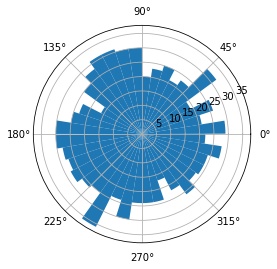

In [15]:
phs2 = all_phase[2, :, 1, 150]  # Let's try electrode 1...

# Plot a polar histogram.
plt.figure(figsize=(4, 4))
ax = plt.subplot(111, polar=True)
plt.hist(phs2, 40);

print(circ.rayleigh(phs2)[0])

No significant phase locking here. These phases are distributed uniformly around the circle.

Finally, let's ask if there's a difference between remembered and not-remembered phase locking.

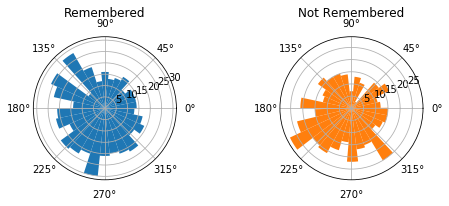

In [16]:
recalled = np.array(recalled)

phs_rec = all_phase[2, recalled==1, 36, 150]
phs_nrec = all_phase[2, recalled==0, 36, 150]

# Plot a polar histogram.
plt.figure(figsize=(7, 3))
ax = plt.subplot(121, polar=True)
plt.hist(phs_rec, 30);
plt.title('Remembered', y=1.1, fontsize=12)
ax = plt.subplot(122, polar=True)
plt.hist(phs_nrec, 30, color='C1');
plt.title('Not Remembered', y=1.1, fontsize=12)
plt.tight_layout()

There are additional tests we could run to ask if there's a significant difference in phase-locking between these two distributions, but we'll leave that to the reference material (in short, permutation tests work well here). Visually, it does not seem as if the remembered/not-remembered distributions are much different.

### Cross-electrode phase-locking (connectivity)

Computing phase-locking at a single electrode tells us whether there's a bias in the preferred phase of an oscillation, at a given time. But if we want to know whether there's correlated phases *between* two electrodes, we need to slightly modify our procedure.

#### Computing phase-locking value between electrodes
1. Extract phase timeseries from both electrodes at desired frequency.
2. Subtract phase timeseries from one another (i.e. find the phase difference).
3. Compute the **resultant vector length**, a measure of phase consistency, at an appropriate window in the difference timeseries.
4. *Optional*: Depending on your analysis design, you can also compute PLV over time, instead of over trials, by measuring the resultant vector length across samples in one timeseries.

In [17]:
# Let's try computing 5Hz connectivity between electrode 10 and 22.
elec1 = all_phase[2, :, 10, :]
elec2 = all_phase[2, :, 22, :]

# The cdiff function keeps subtracted phases within the 0 to +2pi range.
diff = circ.cdiff(elec1, elec2)

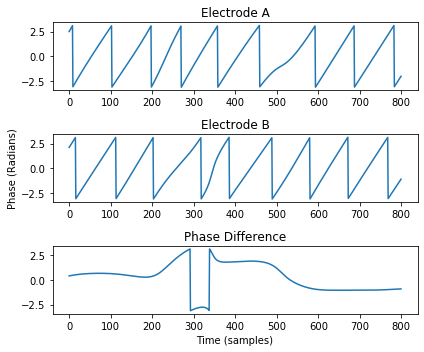

In [18]:
# Just visualize the first event.
plt.figure(figsize=(6, 5))
ax = plt.subplot(311)
plt.plot(elec1[0])
plt.title('Electrode A')
ax = plt.subplot(312)
plt.plot(elec2[0])
plt.title('Electrode B')
plt.ylabel('Phase (Radians)')
ax = plt.subplot(313)
plt.plot(diff[0])
plt.xlabel('Time (samples)')
plt.title('Phase Difference')
plt.tight_layout()

The bottom row shows the phase difference, over time, between electrodes 10 and 20. One way to assess connectivity between these electrodes would be to examine the **consistency** of this phase difference, over time. For example, is there a consistent phase difference between these two electrodes across many oscillations? Sure looks like it!

Note that the crossings from pi to -pi do not actually indicate a sharp change, but are just how the wrapped values get displayed in the plot.

T-stat: -1.959432027795776


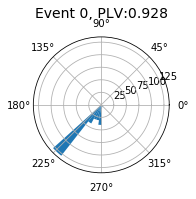

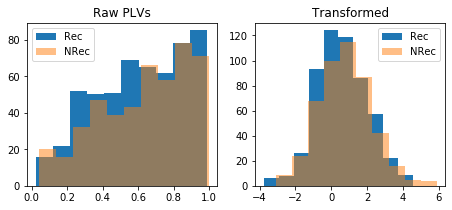

In [19]:
# Plot the distribution of phase differences between electrodes for
# event 1, from 0 to 600 ms
plt.figure(figsize=(2.5, 2.5))
ax = plt.subplot(111, polar=True)
diff_range = diff[1, 0:300]
plt.hist(diff_range, 10);
plt.title('Event 0, PLV:'+str(np.round(circ.resultant_vector_length(diff_range), 3)), y=1.1, fontsize=14)

# Compute the mean resultant vector length, which tells us the strength of phase locking
rvls = circ.resultant_vector_length(diff[:, 0:300], axis=1)

# Compare recalled vs. not-recalled phase locking

plt.figure(figsize=(7.5, 3))
ax = plt.subplot(121)
plt.hist(rvls[recalled==1], label='Rec')
plt.hist(rvls[recalled==0], alpha=0.5, label='NRec')
plt.legend()
plt.title('Raw PLVs')

from scipy.special import logit  # the logit transform will make our RVL distributions more normal
ax = plt.subplot(122)
plt.hist(logit(rvls[recalled==1]), label='Rec')
plt.hist(logit(rvls[recalled==0]), alpha=0.5, label='NRec')
plt.legend()
plt.title('Transformed')

# The t-test is not the best test for these data,
# since they're restricted to 0 to 1 and can exhibit highly non-normal distributions.
# But for the sake of a demo:
from scipy.stats import ttest_ind
t, p = ttest_ind(logit(rvls[recalled==1]), logit(rvls[recalled==0]), equal_var=False)
print('T-stat: '+str(t))

What if we do the same analysis, but ask about phase-locking over trials instead of over time?

Rem PLV:0.05372364106145693
NRem PLV:0.0735297538952335


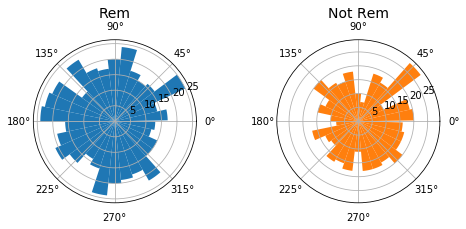

In [20]:
# Take the mean phase difference over time.
# First, average phase differences in our window of interest.
diff_avg = circ.mean(diff[:, :300], axis=1)

# Plot results.
plt.figure(figsize=(8, 3))
ax = plt.subplot(121, polar=True)
plt.hist(diff_avg[recalled==1], 30);
plt.title('Rem', y=1.1, fontsize=14)
plt.subplot(122, polar=True)
plt.hist(diff_avg[recalled==0], 30, color='C1')
plt.title('Not Rem', y=1.1, fontsize=14)

# Compute mean resultant vector length (i.e. PLV).
print('Rem PLV:'+str(circ.resultant_vector_length(diff_avg[recalled==1])))
print('NRem PLV:'+str(circ.resultant_vector_length(diff_avg[recalled==0])))

Ideally, we'd use a permutation test to establish whether the difference in phase locking is statistically significant.

## Using MNE for connectivity

MNE makes it almost trivially easy to implement connectivity analyses. However, as you'll see, that simplicity comes with a tradeoff of flexibility. 

In [5]:
from mne.mne_connectivity import spectral_connectivity_epochs

# Get MNE format EEG (note this is coming from one session)
eeg_mne = load.LoadMNE(df_sess, -buf, buf+1600+buf)
eeg_mne = eeg_mne[word_evs.index]
sr = eeg_mne.info['sfreq']

#Compute all possible pairwise combinations of phase-locking value
con_output = spectral_connectivity_epochs(eeg_mne[:100], method='plv', sfreq=sr, mode='cwt_morlet', cwt_freqs=myfreqs, fmin=3, fmax=8, cwt_n_cycles=5)

ModuleNotFoundError: No module named 'mne.mne_connectivity'

In [22]:
# The output of spectral_connectivity is [con, freqs, times, n_epochs, n_tapers].
# (for multitaper connectivity)

# Compare to the PLV we would get by computing this manually.
idx1 = 50
idx2 = 46

mne_plv = np.mean(con_output[0][idx1, idx2, 2, 500:600])

elec1 = all_phase[2, :, idx2, :]
elec2 = all_phase[2, :, idx1, :]
diff = circ.cdiff(elec1, elec2)
# Taking the last 300 events, since we only ran the MNE function on data from session 1.
manual_plv = np.mean( circ.resultant_vector_length(diff[300:400, 0:100], axis=0) )

print('Manual: '+str(manual_plv))
print('MNE: '+str(mne_plv))

Manual: 0.06665375828409709
MNE: 0.07395650186747359


### Adjacency Matrix

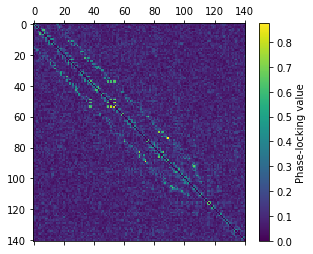

In [23]:
plt.figure(figsize=(4.75, 4))
to_plot_plv = np.mean(con_output[0][:, :, 2, 500:600], 2)
to_plot_plv = np.sum([to_plot_plv, to_plot_plv.T], 0)   # Symmetrize the matrix.
plt.matshow(to_plot_plv, fignum=0, aspect='auto',)
cb = plt.colorbar(); cb.set_label('Phase-locking value')

In [24]:
## Multitaper Coherence

# Compute all possible pairwise combinations of multitaper coherence.
# Should be much faster than wavelets!
con_output_coh = spectral_connectivity(eeg_mne[:100], method='coh', sfreq=sr, mode='multitaper', fmin=3, fmax=8, faverage=True, tmin=0, tmax=0.2)

Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 9870 connections
    using t=0.000s..0.200s for estimation (101 points)
    frequencies: 5.0Hz..5.0Hz (1 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Coherence
    computing connectivity for epoch 1
    computing connectivity for epoch 2
    computing connectivity for epoch 3
    computing connectivity for epoch 4
    computing connectivity for epoch 5
    computing connectivity for epoch 6
    computing connectivity for epoch 7
    computing connectivity for epoch 8
    computing connectivity for epoch 9
    computing connectivity for epoch 10
    computing connectivity for epoch 11
    computing connectivity for epoch 12
    computing connectivity for epoch 13
    computing connectivity for epoch 14
    computing connectivity for epoch 15


<ipython-input-24-e299b8561c88>:5: RuntimeWarning: fmin=3.000 Hz corresponds to 0.606 < 5 cycles based on the epoch length 0.202 sec, need at least 1.667 sec epochs or fmin=24.752. Spectrum estimate will be unreliable.
  con_output_coh = spectral_connectivity(eeg_mne[:100], method='coh', sfreq=sr, mode='multitaper', fmin=3, fmax=8, faverage=True, tmin=0, tmax=0.2)


    computing connectivity for epoch 16
    computing connectivity for epoch 17
    computing connectivity for epoch 18
    computing connectivity for epoch 19
    computing connectivity for epoch 20
    computing connectivity for epoch 21
    computing connectivity for epoch 22
    computing connectivity for epoch 23
    computing connectivity for epoch 24
    computing connectivity for epoch 25
    computing connectivity for epoch 26
    computing connectivity for epoch 27
    computing connectivity for epoch 28
    computing connectivity for epoch 29
    computing connectivity for epoch 30
    computing connectivity for epoch 31
    computing connectivity for epoch 32
    computing connectivity for epoch 33
    computing connectivity for epoch 34
    computing connectivity for epoch 35
    computing connectivity for epoch 36
    computing connectivity for epoch 37
    computing connectivity for epoch 38
    computing connectivity for epoch 39
    computing connectivity for epoch 40


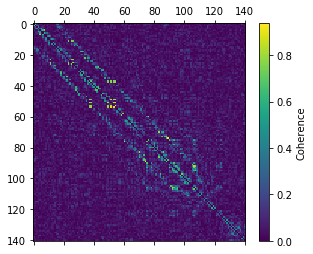

In [25]:
plt.figure(figsize=(4.75, 4))
to_plot_coh = con_output_coh[0][:, :, 0]
to_plot_coh = np.sum([to_plot_coh, to_plot_coh.T], 0)   # Symmetrize the matrix.
plt.matshow(to_plot_coh, fignum=0, aspect='auto',)
cb = plt.colorbar()
cb.set_label('Coherence')

Text(0, 0.5, 'Coherence')

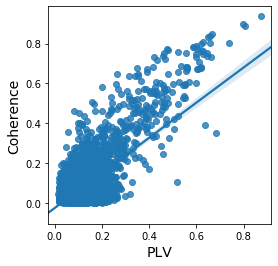

In [26]:
# Directly compare both methods.

A = to_plot_plv[np.tril_indices_from(to_plot_plv, -1)]
B = to_plot_coh[np.tril_indices_from(to_plot_coh, -1)]

import seaborn as sns

plt.figure(figsize=(4, 4))
ax = plt.subplot(111)
sns.regplot(A, B)
plt.xlabel('PLV', fontsize=14)
plt.ylabel('Coherence', fontsize=14)